# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [387]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [388]:
print(os.getcwd())
df = pd.read_csv('data/step2_output.csv')

/Users/alexi.o/Desktop/python/Jupyter-Notebooks/GuidedCapstone


**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [389]:
df.head(5)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [390]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

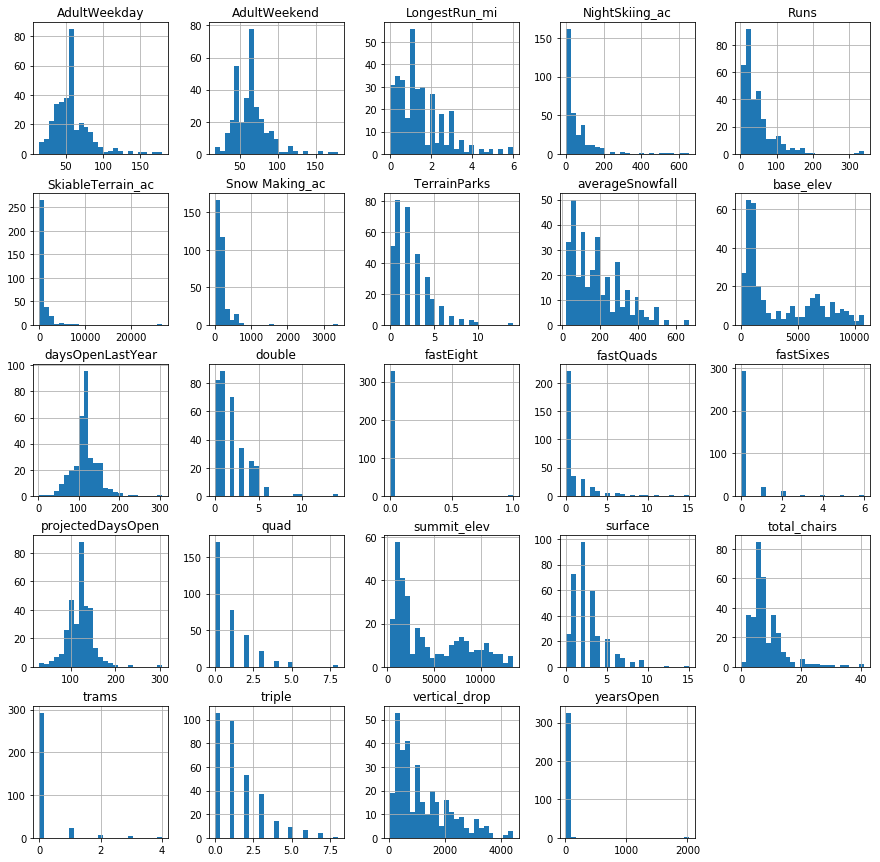

In [392]:
hist = df.hist(bins=25, figsize=(15, 15))
plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

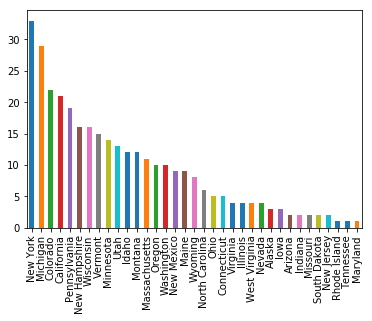

In [393]:
states = df.state.value_counts().plot.bar()

**<font color='teal'>Region Levels Plot</font>**

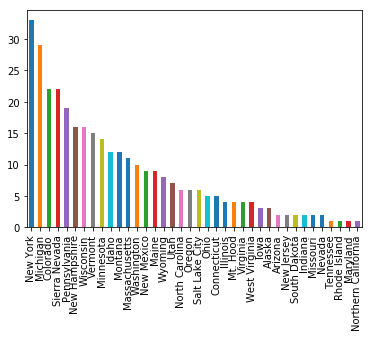

In [394]:
region = df.Region.value_counts().plot.bar()

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [395]:
df.drop(columns=['Region'], inplace=True)
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

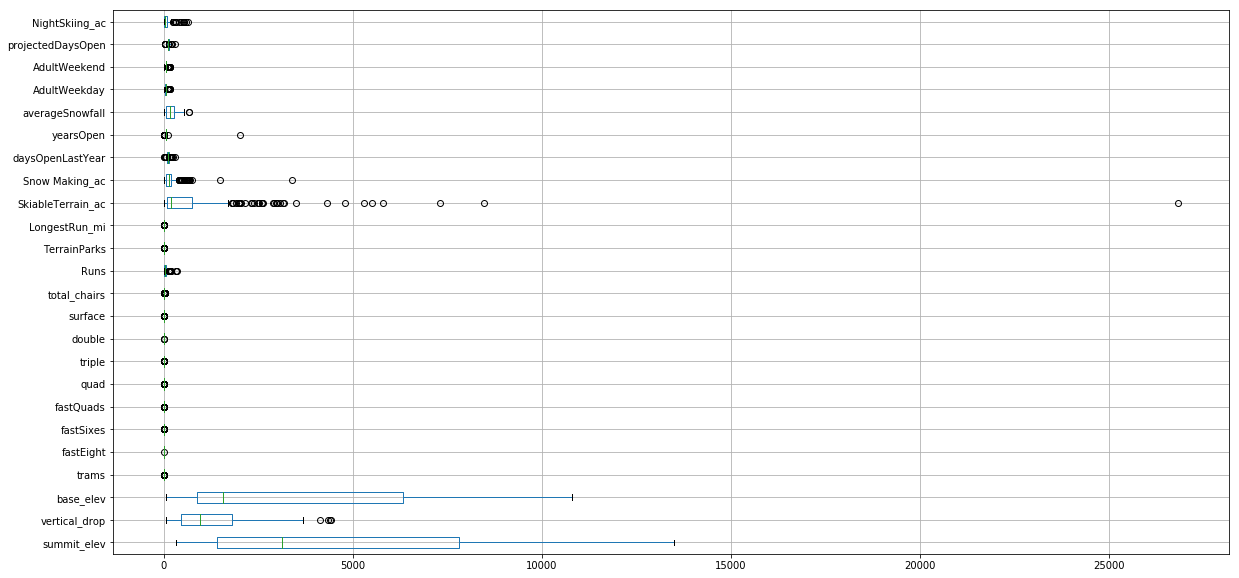

In [396]:
all_columns = df.boxplot(figsize=(20,10), vert=False)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [397]:
IQR = df.quantile(0.75)-df.quantile(0.25)
IQR

summit_elev          6402.250000
vertical_drop        1338.750000
base_elev            5456.250000
trams                   0.000000
fastEight               0.000000
fastSixes               0.000000
fastQuads               1.000000
quad                    1.000000
triple                  2.000000
double                  2.000000
surface                 2.000000
total_chairs            5.000000
Runs                   41.000000
TerrainParks            2.000000
LongestRun_mi           1.400000
SkiableTerrain_ac     654.801223
Snow Making_ac        137.000000
daysOpenLastYear       30.000000
yearsOpen              18.750000
averageSnowfall       207.500000
AdultWeekday           24.000000
AdultWeekend           23.000000
projectedDaysOpen      34.750000
NightSkiing_ac         83.750000
dtype: float64

In [398]:
high = df.quantile(0.75) + 1.5 * IQR
high

summit_elev          17409.375000
vertical_drop         3808.125000
base_elev            14509.625000
trams                    0.000000
fastEight                0.000000
fastSixes                0.000000
fastQuads                2.500000
quad                     2.500000
triple                   5.000000
double                   6.000000
surface                  6.000000
total_chairs            17.500000
Runs                   121.500000
TerrainParks             6.000000
LongestRun_mi            4.100000
SkiableTerrain_ac     1722.003058
Snow Making_ac         397.500000
daysOpenLastYear       175.000000
yearsOpen               96.875000
averageSnowfall        590.000000
AdultWeekday           103.000000
AdultWeekend           106.500000
projectedDaysOpen      188.125000
NightSkiing_ac         209.375000
dtype: float64

In [399]:
low = df.quantile(0.25) - 1.5 * IQR
low

summit_elev         -8199.625000
vertical_drop       -1546.875000
base_elev           -7315.375000
trams                   0.000000
fastEight               0.000000
fastSixes               0.000000
fastQuads              -1.500000
quad                   -1.500000
triple                 -3.000000
double                 -2.000000
surface                -2.000000
total_chairs           -2.500000
Runs                  -42.500000
TerrainParks           -2.000000
LongestRun_mi          -1.500000
SkiableTerrain_ac    -897.201835
Snow Making_ac       -150.500000
daysOpenLastYear       55.000000
yearsOpen              21.875000
averageSnowfall      -240.000000
AdultWeekday            7.000000
AdultWeekend           14.500000
projectedDaysOpen      49.125000
NightSkiing_ac       -125.625000
dtype: float64

In [404]:
# Put numerical columns into a list
numerical_columns = [
  'summit_elev', 'vertical_drop', 'base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads',
    'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs','TerrainParks', 'LongestRun_mi',
'SkiableTerrain_ac','Snow Making_ac','daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
'AdultWeekend','projectedDaysOpen','NightSkiing_ac'
]

outliers = (df[numerical_columns] < low) | (df[numerical_columns] > high)
outliers

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [405]:
df_no_outliers = df[~outliers.any(axis=1)]
df_no_outliers.shape

(176, 26)

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

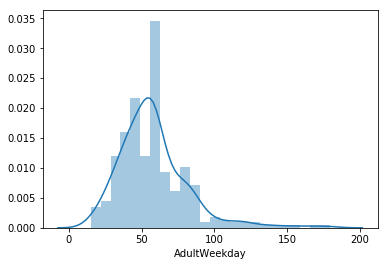

In [407]:
sns.distplot(df['AdultWeekday'])

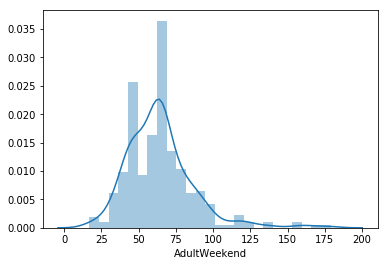

In [408]:
sns.distplot(df['AdultWeekend'])

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

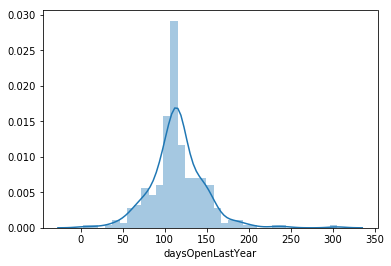

In [409]:
sns.distplot(df['daysOpenLastYear']);

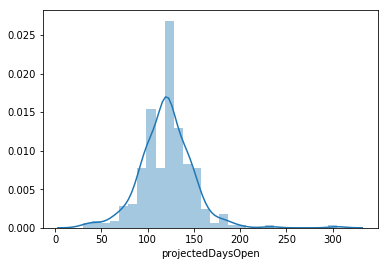

In [410]:
sns.distplot(df['projectedDaysOpen']);

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

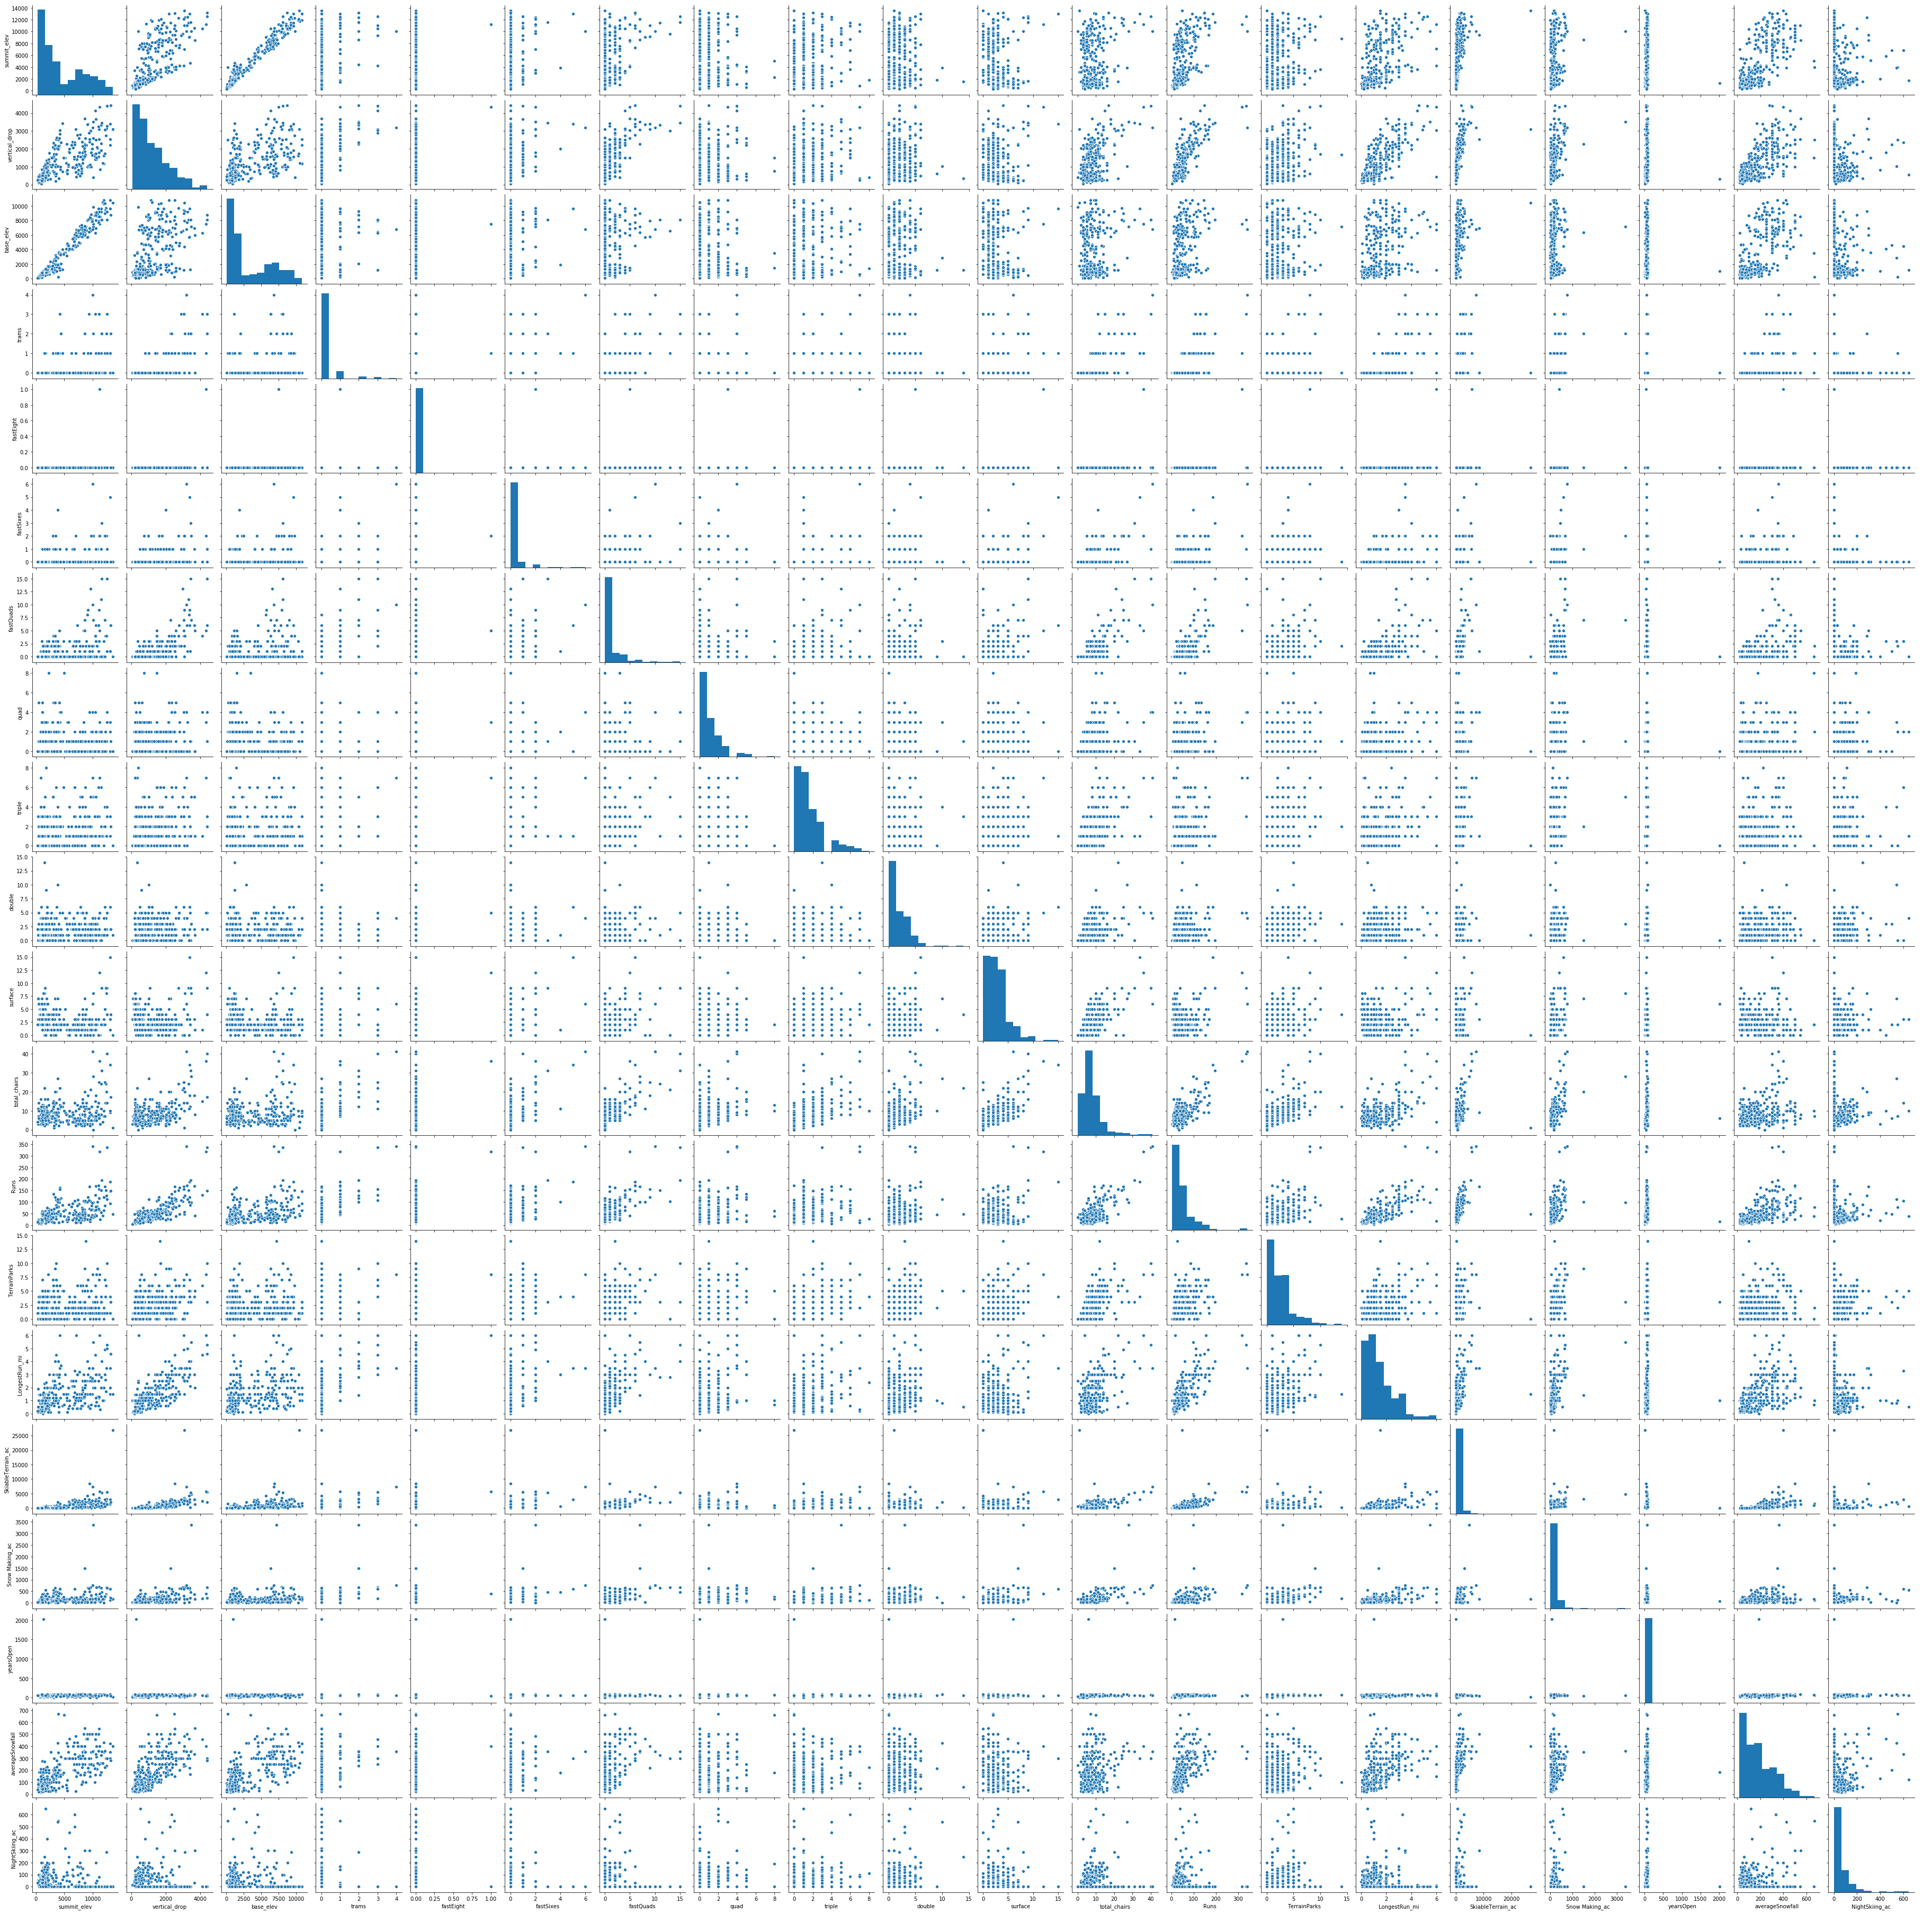

In [411]:
sns.pairplot(df.drop(['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear', 'projectedDaysOpen'], axis=1))

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

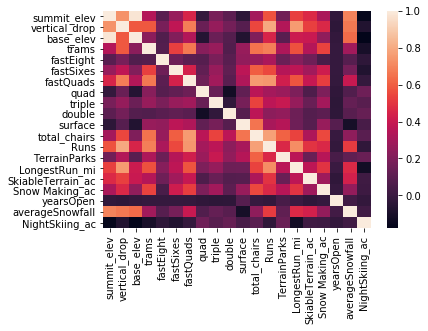

In [412]:
corr = df.drop(['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear', 'projectedDaysOpen'], axis=1).corr()
sns.heatmap(corr)

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [413]:
corr

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,yearsOpen,averageSnowfall,NightSkiing_ac
summit_elev,1.000000,0.735859,0.979080,0.342588,0.097174,0.264926,0.449338,-0.012729,0.183979,0.106680,-0.039470,0.301986,0.573033,0.162745,0.529771,0.468912,0.316131,-0.024759,0.693432,-0.163273
vertical_drop,0.735859,1.000000,0.587713,0.587676,0.182597,0.377766,0.679942,0.141729,0.263594,0.171421,0.085946,0.548563,0.797288,0.341957,0.759227,0.530349,0.466209,-0.031188,0.664244,-0.074046
base_elev,0.979080,0.587713,1.000000,0.234040,0.073086,0.209398,0.338322,-0.059273,0.147100,0.080290,-0.067700,0.203831,0.451071,0.097903,0.413270,0.406045,0.246614,-0.019304,0.633957,-0.177896
trams,0.342588,0.587676,0.234040,1.000000,0.081576,0.528622,0.664149,0.222549,0.266528,0.073272,0.267745,0.651348,0.685665,0.326955,0.568705,0.342238,0.537990,-0.009907,0.293778,-0.101217
fastEight,0.097174,0.182597,0.073086,0.081576,1.000000,0.153793,0.100013,0.086959,0.187561,0.096334,0.251430,0.264079,0.322063,0.146971,0.219773,0.154547,0.051285,-0.008923,0.088843,-0.033609
fastSixes,0.264926,0.377766,0.209398,0.528622,0.153793,1.000000,0.441079,0.121082,0.266456,0.116065,0.369356,0.601428,0.550493,0.350486,0.372252,0.294594,0.418182,-0.009692,0.175473,-0.072625
fastQuads,0.449338,0.679942,0.338322,0.664149,0.100013,0.441079,1.000000,0.150042,0.295470,0.095224,0.332485,0.758113,0.748566,0.428450,0.577042,0.394135,0.522505,-0.016053,0.399696,-0.016352
quad,-0.012729,0.141729,-0.059273,0.222549,0.086959,0.121082,0.150042,1.000000,0.137334,-0.118258,0.121082,0.363444,0.301140,0.273912,0.198511,0.064448,0.195866,-0.028899,0.071365,0.157605
triple,0.183979,0.263594,0.147100,0.266528,0.187561,0.266456,0.295470,0.137334,1.000000,-0.024306,0.180011,0.536109,0.366107,0.397331,0.261977,0.137168,0.299360,-0.035478,0.126008,0.093376
double,0.106680,0.171421,0.080290,0.073272,0.096334,0.116065,0.095224,-0.118258,-0.024306,1.000000,0.085508,0.366964,0.236585,0.253365,0.149062,0.079850,0.105106,-0.030999,0.092217,0.130975


In [414]:
# summit_elev and base_elev are ~98% correlated so removing summit_elev
df.drop(columns='summit_elev', inplace=True)

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [427]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

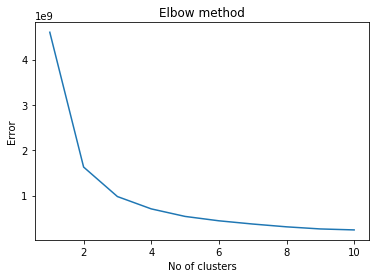

In [428]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [430]:
kmeans = KMeans(n_clusters=3).fit(x.T)

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [429]:
kmeans.cluster_centers_

array([[ 3.06454545e+03,  9.37290909e+03,  9.09090909e-01,
         8.67361738e-19,  1.00000000e+00,  4.36363636e+00,
         1.09090909e+00,  2.18181818e+00,  2.63636364e+00,
         5.72727273e+00,  1.79090909e+01,  1.37818182e+02,
         3.00000000e+00,  3.03636364e+00,  2.19809091e+03,
         3.87090909e+02,  1.66454545e+02,  6.15454545e+01,
         3.31727273e+02,  8.87804348e+01,  9.16212773e+01,
         1.54277546e+02,  2.61818182e+01],
       [ 5.29082803e+02,  8.82770701e+02,  1.27388535e-02,
        -7.80625564e-18,  3.82165605e-02,  2.10191083e-01,
         8.72611465e-01,  1.22292994e+00,  1.66242038e+00,
         2.89171975e+00,  6.91082803e+00,  2.49185651e+01,
         2.02547771e+00,  7.87682509e-01,  1.27532500e+02,
         1.05077958e+02,  1.03085542e+02,  6.72080034e+01,
         9.50878820e+01,  4.67059568e+01,  5.49609257e+01,
         1.08474083e+02,  6.89681529e+01],
       [ 1.27528205e+03,  6.45992308e+03,  2.56410256e-02,
        -2.16840434e-18,  5.1

In [432]:
clusters = pd.DataFrame(kmeans.cluster_centers_.T, columns=['cluster1', 'cluster2', 'cluster3']).set_index(df.index)
df = pd.concat([df, clusters], axis=1)
df.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
state,Alaska,Alaska,Alaska,Arizona,Arizona
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastEight,0,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2
triple,0,0,1,2,3


In [434]:
df.to_csv(os.getcwd() + '/data/step3_output.csv')